# Bike Assignment  -- Multiple Linear Regression Assignment

# Step 1 : Data Understanding

__Checking the data , its spread, its columns , trying to get a feel for the data__

In [189]:
# importing necessary libaries and loading the data into a dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [190]:
#checking the structure of data sheet 
print(df.shape)
print(df.info)

(730, 16)
<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum

In [191]:
#checking the spread of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [192]:
# checking for data types of the current dataset
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  15
Number of Categorical features:  1


since we see there is only one categorical feature mentioned , we need to change the data type and provide appropriate variables datatypes to the features.

# Step 2: Data Vizualization

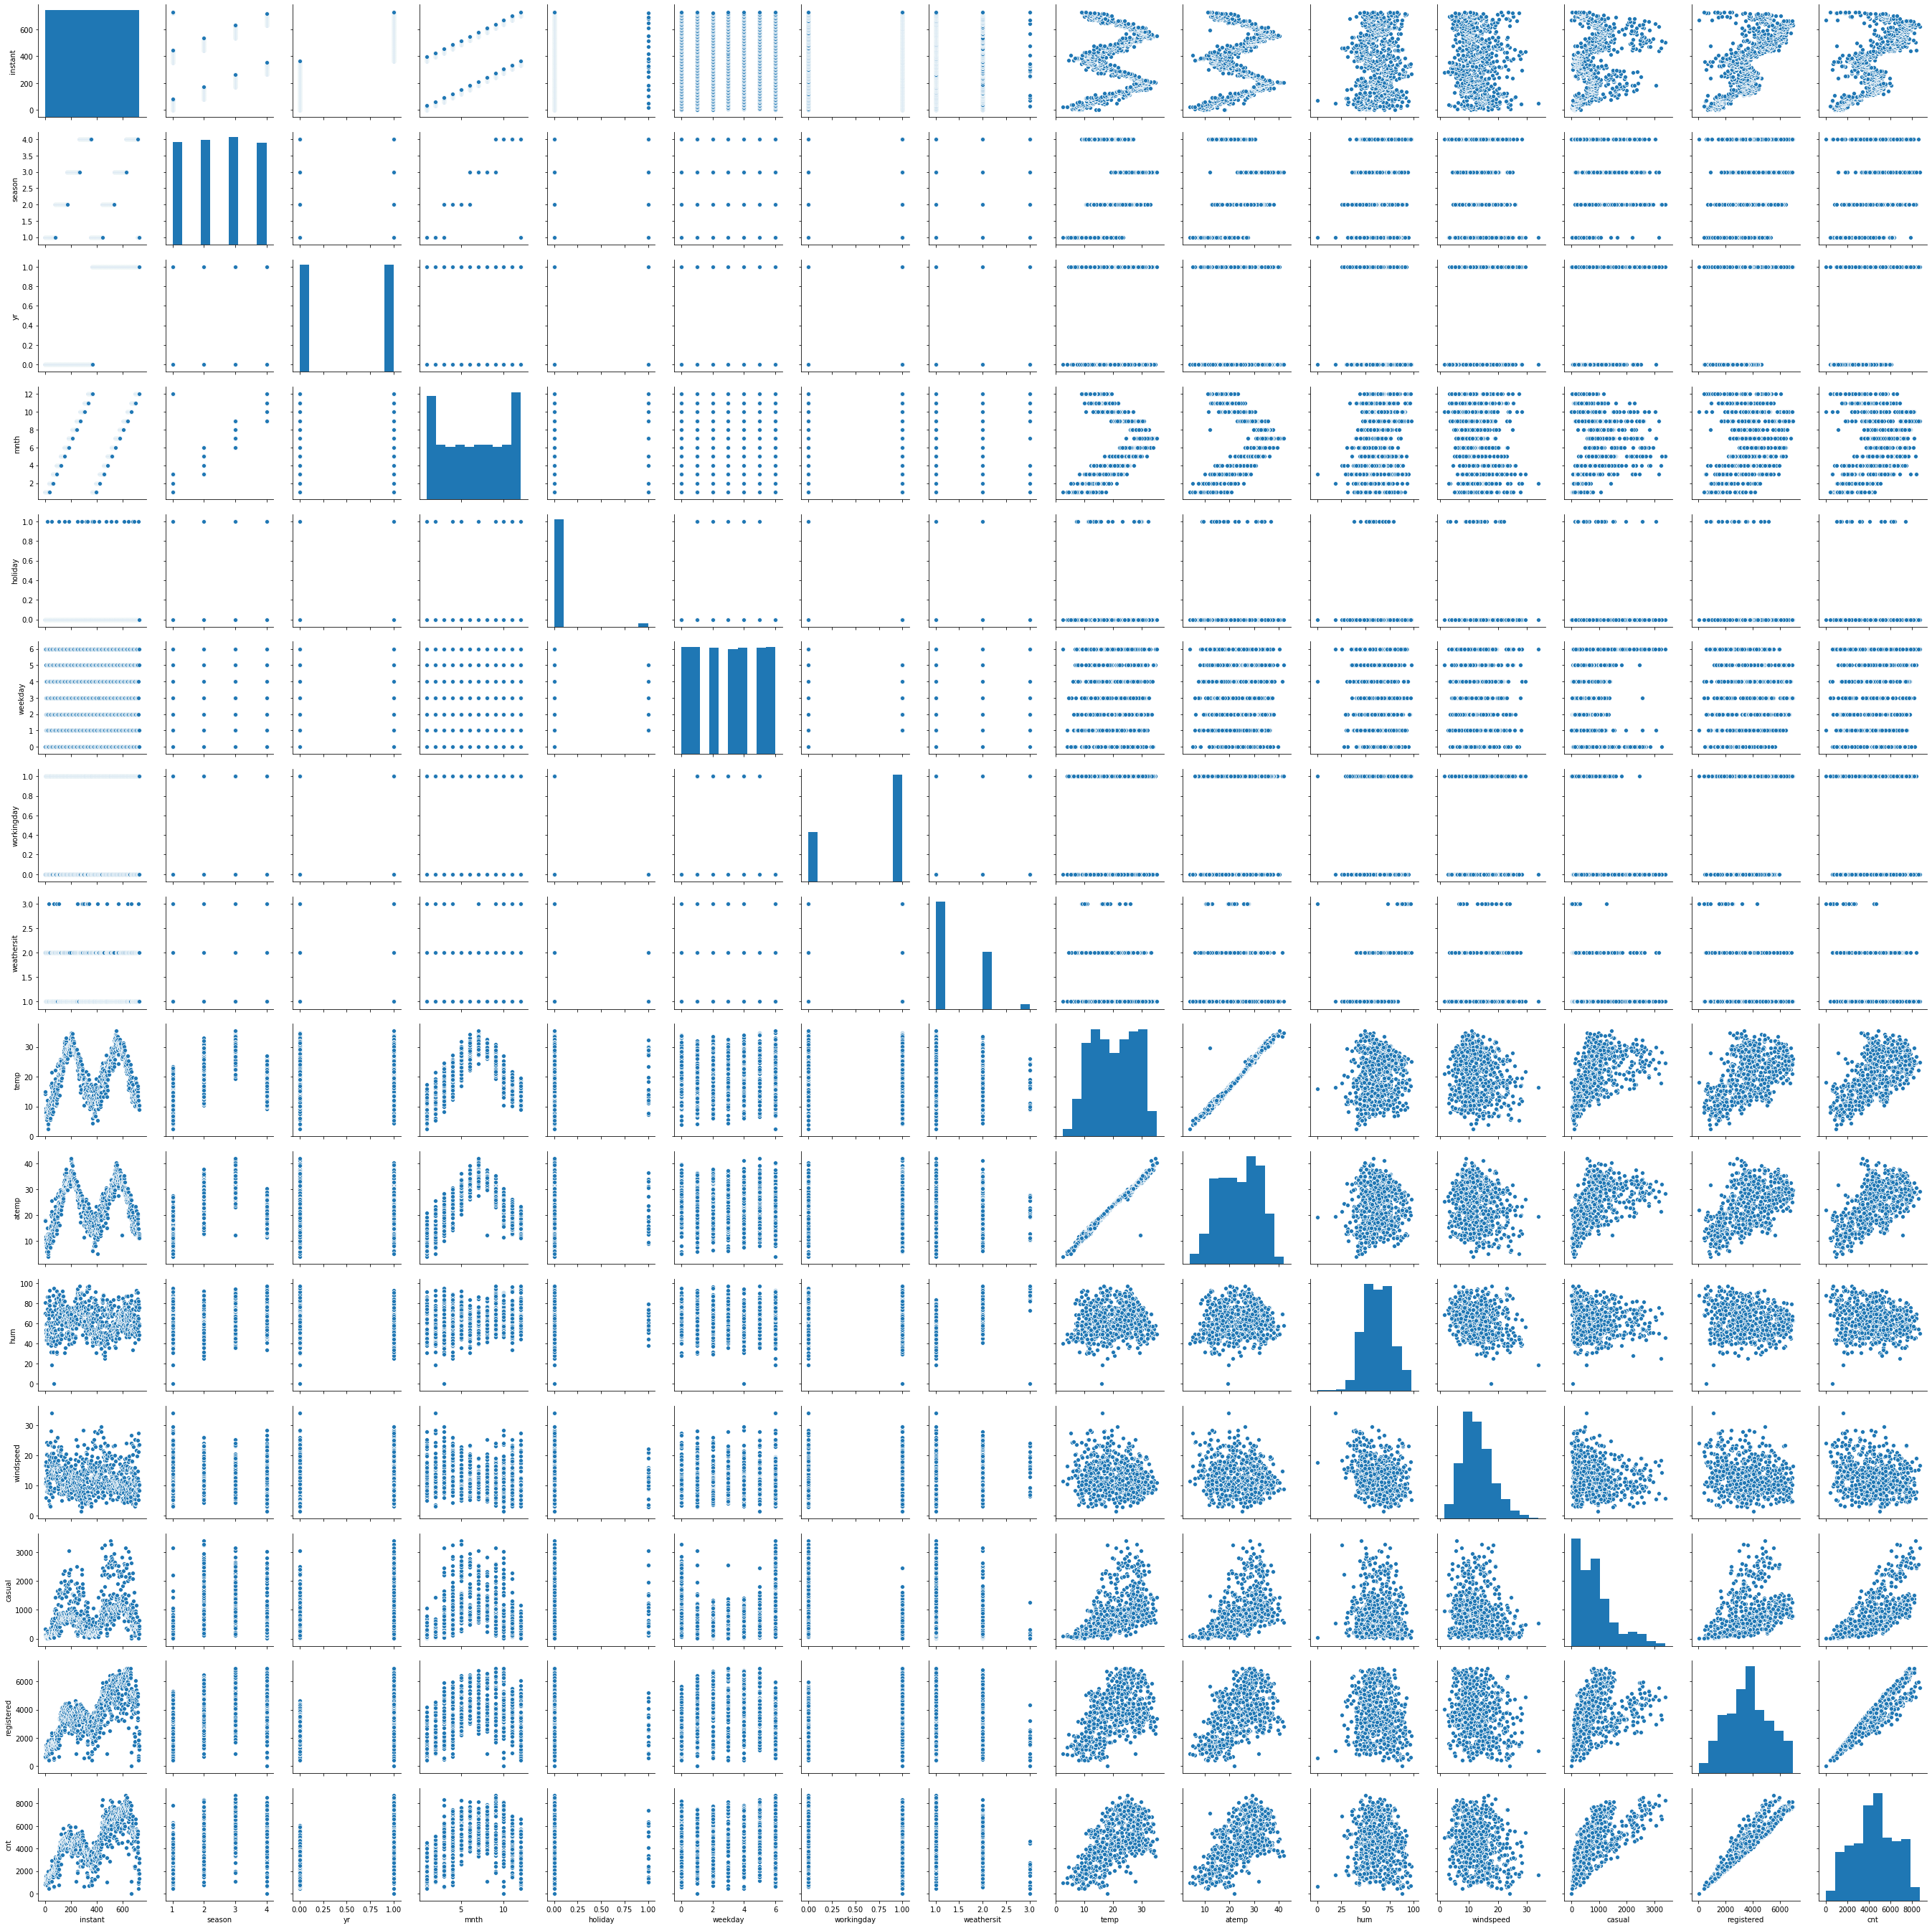

In [193]:
sns.pairplot(df)
plt.show()

Here we will get to know the appropriate/meaningfull features with respect to target variable. Here we need to desde which features to drop & wich once to keep (on accord of the relevance by watching the pattern)

# Step 3: Data Preperation

In [194]:
#changing data types for features

df.season = df.season.astype('category')
df.mnth = df.mnth.astype('category')
df.weekday = df.weekday.astype('category')
df.weathersit = df.weathersit.astype('category')

In [195]:
#defining functions to label categorical variables

#function for seasons
def seasons(n):
    if n == 1:
        return 'spring'
    elif n == 2:
        return 'summer'
    elif n == 3:
        return 'fall'
    elif n == 4:
        return 'winter'
    else :
        return 'NA'

    
#labelling categorical variables
df['season'] = df['season'].apply(lambda x: seasons(x))

#counting categorical values
print(df['season'].value_counts())
        

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [196]:
df.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [197]:
#function for months
def months(n):
    if n==1:
        return 'JAN'
    elif n==2:
        return 'FEB'
    elif n==3:
        return 'MAR'
    elif n==4:
        return 'April'
    elif n==5:
        return 'MAY'
    elif n==6:
        return 'June'
    elif n==7:
        return 'July'
    elif n==8:
        return 'AUG'
    elif n==9:
        return 'SEP'
    elif n==10:
        return 'OCT'
    elif n==11:
        return 'NOV'
    elif n==12:
        return 'DEC'
    else:
        return 'NA'
        

#labelling months
df['mnth'] = df['mnth'].apply(lambda x: months(x))

#counting months
df['mnth'].value_counts()

DEC      62
OCT      62
AUG      62
July     62
MAY      62
MAR      62
JAN      62
NOV      60
SEP      60
June     60
April    60
FEB      56
Name: mnth, dtype: int64

In [198]:
#function for weekday

def wday(n):
    if n==1:
        return 'Monday'
    elif n==2:
        return 'Tuesday'
    elif n==3:
        return 'Wednesday'
    elif n==4:
        return 'Thursday'
    elif n==5:
        return 'Friday'
    elif n==6:
        return 'Saturday'
    elif n==0:
        return 'Sunday'
    else:
        return 'NA'

#labelling weekdays
df['weekday'] = df['weekday'].apply(lambda x: wday(x))

#counting weekdays
df['weekday'].value_counts()


Saturday     105
Monday       105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

In [199]:
#function for weather
def weather(n):
    if n == 1:
        return 'clear'
    elif n == 2:
        return 'misty'
    elif n == 3:
        return 'snow/rainfall'
    else :
        return 'NA'

    
#labelling categorical variables
df['weathersit'] = df['weathersit'].apply(lambda x: weather(x))

#counting categorical values
print(df['weathersit'].value_counts())
        

clear            463
misty            246
snow/rainfall     21
Name: weathersit, dtype: int64


In [200]:
# checking for missing values int he dataset

def missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(60))
    
missing(df)

            Total  Percent
cnt             0      0.0
registered      0      0.0
casual          0      0.0
windspeed       0      0.0
hum             0      0.0
atemp           0      0.0
temp            0      0.0
weathersit      0      0.0
workingday      0      0.0
weekday         0      0.0
holiday         0      0.0
mnth            0      0.0
yr              0      0.0
season          0      0.0
dteday          0      0.0
instant         0      0.0


In [201]:
# removing all the unrequired features/ columns

df = df.drop(['instant','dteday','atemp','casual','registered'], axis = 1)

** Vizualizing againast categorical variables**

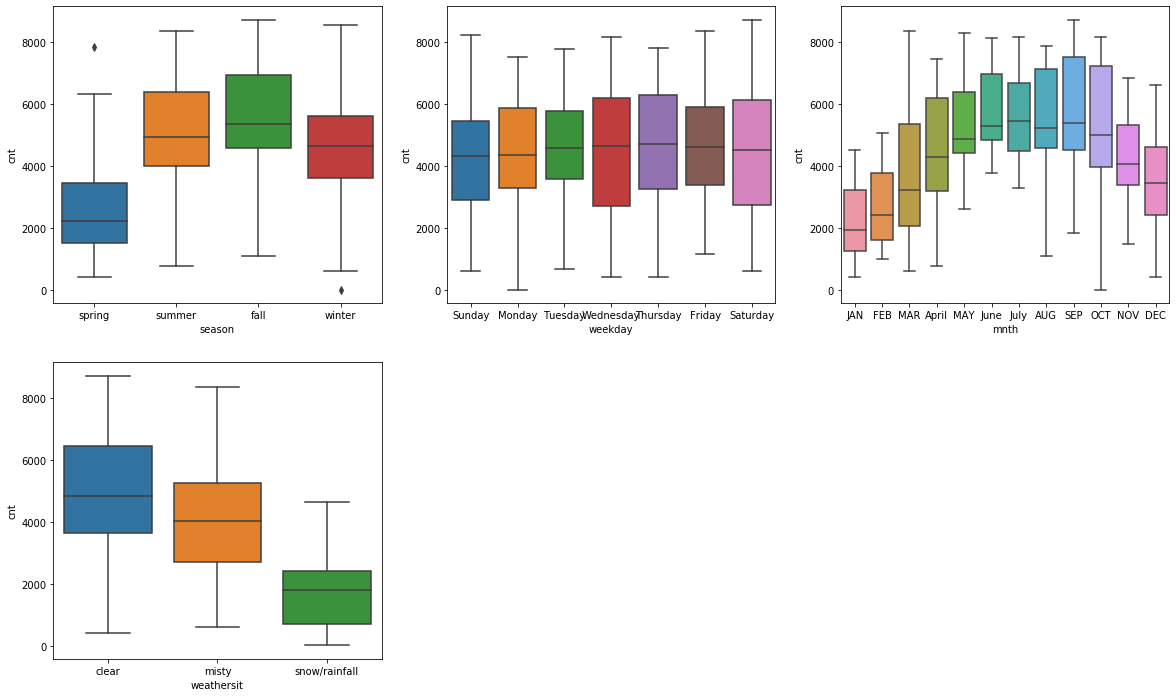

In [202]:
#before that lets check the categorical variables how they plot wrt target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

As we cam see there is only 3 types of weather, 4 seasons, 7 days & 12 months as per out categorization.
1. we see that during the fall & summer season the demand is higher
2. The median remains the same throughout the week, but the number of cnt increased in weekend and wednesday(middle of da week)
3.the over all trend says that the demand of the bike increased through out the year but it drops towards the end of the year, since its winter and that could also be obeerved in the season graph.

**After labelling the data and converting the dtype of the feature to categorical, we need to converrt the categorical vatiables into dummy variables**

In [203]:
# Get the dummy variables for the feature 'seasons' and store it in a new variable - 'sea'

sea = pd.get_dummies(df['season'])

# Check what the dataset 'sea' looks like
sea.head()

season,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [204]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'days'

days = pd.get_dummies(df['weekday'])

# Check what the dataset 'sea' looks like
days.head()

weekday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [205]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'

month = pd.get_dummies(df['mnth'])

# Check what the dataset 'sea' looks like
month.head()

mnth,JAN,FEB,MAR,April,MAY,June,July,AUG,SEP,OCT,NOV,DEC
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [206]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'cloud'

cloud= pd.get_dummies(df['weathersit'])

# Check what the dataset 'sea' looks like
cloud.head()

weathersit,clear,misty,snow/rainfall
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [207]:
# concatning all the variables and removing the respective categorical variables
#adding seasons
df = pd.concat([df, sea], axis = 1)

#adding days
df = pd.concat([df,days], axis =1)

#adding month
df = pd.concat([df,month], axis =1)

#adding weathersit
df = pd.concat([df,cloud], axis =1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,June,July,AUG,SEP,OCT,NOV,DEC,clear,misty,snow/rainfall
0,spring,0,JAN,0,Saturday,0,misty,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,1,0
1,spring,0,JAN,0,Sunday,0,misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,JAN,0,Monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,JAN,0,Tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,JAN,0,Wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [208]:
# dropping the features for which we have added he dummy variables for
df = df.drop(['season','weathersit','mnth','weekday'], axis = 1)


In [209]:
df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,...,June,July,AUG,SEP,OCT,NOV,DEC,clear,misty,snow/rainfall
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Step 4: Splitting dataset into trainning and test dataset

In [210]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [211]:
#rescaling the features, excluding binary and dummy variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric = ['temp', 'hum', 'windspeed', 'cnt']

df_train[numeric] = scaler.fit_transform(df_train[numeric])

df_train.head()

C:\Users\adash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\adash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,...,June,July,AUG,SEP,OCT,NOV,DEC,clear,misty,snow/rainfall
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,1,...,0,1,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


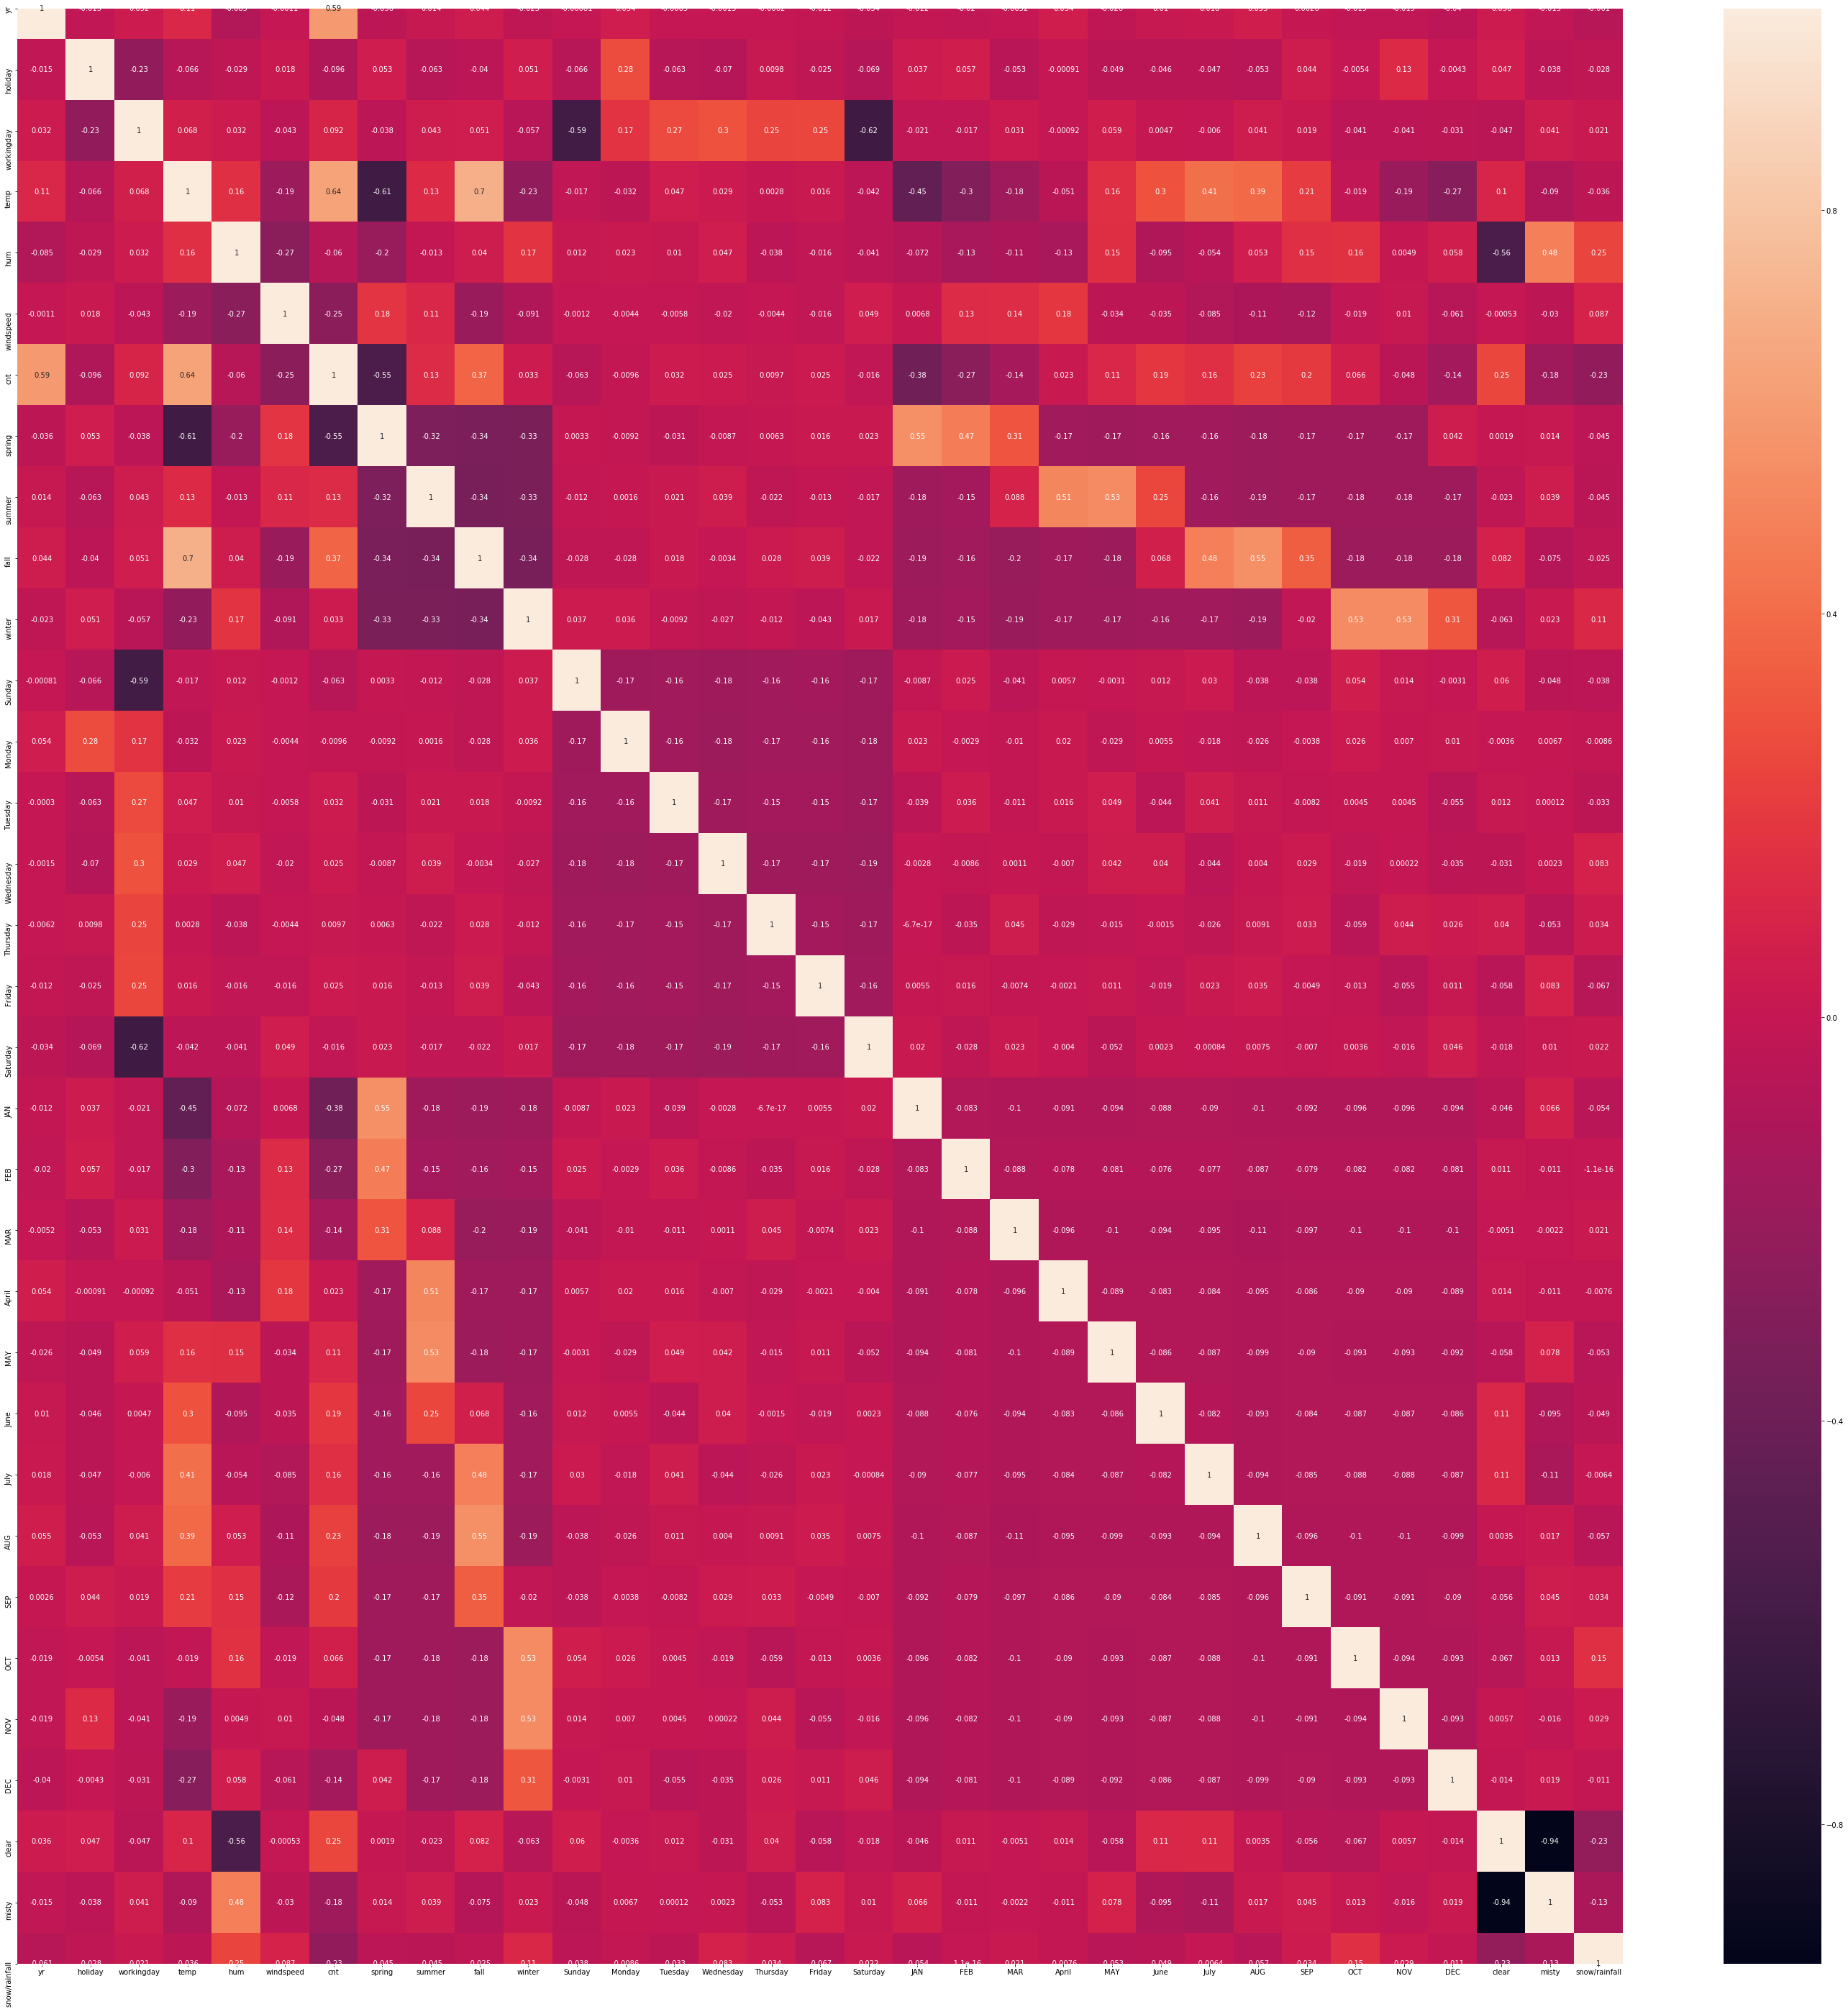

In [212]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

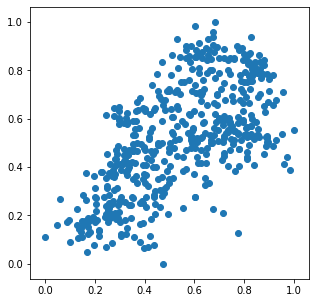

In [213]:
#checking the most relevant, corelated feature temperature againast target variable
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [214]:
# Dividing X & y for modelling

y_train = df_train.pop('cnt')
X_train = df_train

# Step 5 : Building a linear regression Model

In [215]:
# using RFE

# importing required libraries for running RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# running RFE with output variable as 18
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)            
rfe = rfe.fit(X_train, y_train)

In [216]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 13),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', False, 15),
 ('windspeed', False, 14),
 ('spring', True, 1),
 ('summer', False, 11),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Sunday', True, 1),
 ('Monday', False, 3),
 ('Tuesday', True, 1),
 ('Wednesday', False, 4),
 ('Thursday', False, 6),
 ('Friday', False, 2),
 ('Saturday', False, 5),
 ('JAN', False, 10),
 ('FEB', False, 8),
 ('MAR', True, 1),
 ('April', True, 1),
 ('MAY', False, 9),
 ('June', True, 1),
 ('July', True, 1),
 ('AUG', False, 7),
 ('SEP', True, 1),
 ('OCT', True, 1),
 ('NOV', True, 1),
 ('DEC', True, 1),
 ('clear', True, 1),
 ('misty', True, 1),
 ('snow/rainfall', True, 1)]

In [217]:
#features ythat deemed important for RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'spring', 'fall', 'winter', 'Sunday', 'Tuesday',
       'MAR', 'April', 'June', 'July', 'SEP', 'OCT', 'NOV', 'DEC', 'clear',
       'misty', 'snow/rainfall'],
      dtype='object')

In [218]:
#features athat are rejected by RFE
X_train.columns[~rfe.support_]

Index(['yr', 'workingday', 'hum', 'windspeed', 'summer', 'Monday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'JAN', 'FEB', 'MAY', 'AUG'],
      dtype='object')

**Building model by using statusmodel**

In [219]:
# X_test dataframe with RFE approved features
X_train_rfe = X_train[col]

In [220]:
# adding constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\adash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Model1**

In [221]:
#running linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [222]:
# summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     38.76
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.73e-79
Time:                        23:23:59   Log-Likelihood:                 255.22
No. Observations:                 510   AIC:                            -474.4
Df Residuals:                     492   BIC:                            -398.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0767      0.031      2.444      0.015       0.015       0.138
holiday          -0.1127      0.043     -2.617      0.009      -0.197      -0.028
temp              0.6129      0.060     10.267      0.000       0.496       0.730
spring           -0.0833      0.029     -2.910      0.004      -0.140      -0.027
fall             -0.0327      0.027     -1.211      0.226      -0.086       0.020
winter            0.1149      0.043      2.672      0.008       0.030       0.199
Sunday           -0.0515      0.019     -2.661      0.008      -0.089      -0.013
Tuesday          -0.0168      0.020     -0.841      0.401      -0.056       0.022
MAR               0.0221      0.025      0.887      0.375      -0.027       0.071
April             0.0281      0.031      0.903      0.367      -0.033       0.089
June             -0.0252      0.030     -0.851      0.395      -0.083       0.033
July             -0.0721      0.031     -2.294      0.022      -0.134      -0.010
SEP               0.0580      0.030      1.919      0.056      -0.001       0.117
OCT              -0.0354      0.046     -0.774      0.439      -0.125       0.054
NOV              -0.0617      0.046     -1.336      0.182      -0.152       0.029
DEC              -0.0490      0.037     -1.309      0.191      -0.123       0.025
clear             0.1711      0.016     10.443      0.000       0.139       0.203
misty             0.0848      0.016      5.236      0.000       0.053       0.117
snow/rainfall    -0.1793      0.031     -5.765      0.000      -0.240      -0.118
==============================================================================
Omnibus:                       13.331   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.147
Skew:                           0.047   Prob(JB):                       0.0281
Kurtosis:                       2.428   Cond. No.                     4.93e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Calculating VIF**

In [223]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\adash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\adash\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
18,snow/rainfall,inf
17,misty,inf
16,clear,inf
5,winter,7.90
2,temp,4.15
14,NOV,3.84
13,OCT,3.76
3,spring,3.45
4,fall,3.23
15,DEC,2.48


we are getting high R^2 & adjusted R^2 value, but on checking the VIF we see that most of the features have infinite colinearity. Thus we will decrease the bumber of features aagain and try to reduce the features with high P value there on.

Initially consifered the RFE feature linit as 30 for which we got relevance % of 83, but lot of variables have infinite colinearity, hence decreasing the RFE variables to minimun 18 after trying all the numbers

**Model2**

dropping the freatures that have the hoghest level of colinearity, one by one

In [224]:
# removing snow/rainfall as it had the higest colinearity 
X_train_new = X_train_rfe.drop(["snow/rainfall"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     38.76
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.73e-79
Time:                        23:23:59   Log-Likelihood:                 255.22
No. Observations:                 510   AIC:                            -474.4
Df Residuals:                     492   BIC:                            -398.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1026      0.055     -1.859      0.064      -0.211       0.006
holiday       -0.1127      0.043     -2.617      0.009      -0.197      -0.028
temp           0.6129      0.060     10.267      0.000       0.496       0.730
spring        -0.0833      0.029     -2.910      0.004      -0.140      -0.027
fall          -0.0327      0.027     -1.211      0.226      -0.086       0.020
winter         0.1149      0.043      2.672      0.008       0.030       0.199
Sunday        -0.0515      0.019     -2.661      0.008      -0.089      -0.013
Tuesday       -0.0168      0.020     -0.841      0.401      -0.056       0.022
MAR            0.0221      0.025      0.887      0.375      -0.027       0.071
April          0.0281      0.031      0.903      0.367      -0.033       0.089
June          -0.0252      0.030     -0.851      0.395      -0.083       0.033
July          -0.0721      0.031     -2.294      0.022      -0.134      -0.010
SEP            0.0580      0.030      1.919      0.056      -0.001       0.117
OCT           -0.0354      0.046     -0.774      0.439      -0.125       0.054
NOV           -0.0617      0.046     -1.336      0.182      -0.152       0.029
DEC           -0.0490      0.037     -1.309      0.191      -0.123       0.025
clear          0.3504      0.040      8.680      0.000       0.271       0.430
misty          0.2641      0.041      6.456      0.000       0.184       0.344
==============================================================================
Omnibus:                       13.331   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.147
Skew:                           0.047   Prob(JB):                       0.0281
Kurtosis:                       2.428   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.68
16,clear,8.71
17,misty,8.62
5,winter,7.90
2,temp,4.15
14,NOV,3.84
13,OCT,3.76
3,spring,3.45
4,fall,3.23
15,DEC,2.48


**Model3**

In [226]:
# removing OCT as it had the higest P Value
X_train_new1 = X_train_new.drop(["OCT"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     41.18
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.55e-80
Time:                        23:23:59   Log-Likelihood:                 254.91
No. Observations:                 510   AIC:                            -475.8
Df Residuals:                     493   BIC:                            -403.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1057      0.055     -1.921      0.055      -0.214       0.002
holiday       -0.1150      0.043     -2.676      0.008      -0.199      -0.031
temp           0.6113      0.060     10.251      0.000       0.494       0.728
spring        -0.0853      0.028     -2.992      0.003      -0.141      -0.029
fall          -0.0345      0.027     -1.285      0.200      -0.087       0.018
winter         0.0893      0.027      3.251      0.001       0.035       0.143
Sunday        -0.0521      0.019     -2.694      0.007      -0.090      -0.014
Tuesday       -0.0167      0.020     -0.834      0.405      -0.056       0.023
MAR            0.0240      0.025      0.970      0.333      -0.025       0.073
April          0.0289      0.031      0.931      0.352      -0.032       0.090
June          -0.0234      0.030     -0.791      0.429      -0.081       0.035
July          -0.0689      0.031     -2.212      0.027      -0.130      -0.008
SEP            0.0663      0.028      2.347      0.019       0.011       0.122
NOV           -0.0352      0.031     -1.136      0.257      -0.096       0.026
DEC           -0.0300      0.028     -1.062      0.289      -0.086       0.026
clear          0.3537      0.040      8.814      0.000       0.275       0.433
misty          0.2674      0.041      6.576      0.000       0.188       0.347
==============================================================================
Omnibus:                       15.236   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.767
Skew:                           0.041   Prob(JB):                       0.0206
Kurtosis:                       2.401   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.31
15,clear,8.61
16,misty,8.53
2,temp,4.14
3,spring,3.42
5,winter,3.23
4,fall,3.20
13,NOV,1.74
9,April,1.59
11,July,1.57


**Model4**

In [228]:
# removing Tuesday as it had the higest P Value
X_train_new2 = X_train_new1.drop(["Tuesday"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     43.91
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           7.38e-81
Time:                        23:23:59   Log-Likelihood:                 254.55
No. Observations:                 510   AIC:                            -477.1
Df Residuals:                     494   BIC:                            -409.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1065      0.055     -1.935      0.054      -0.215       0.002
holiday       -0.1122      0.043     -2.620      0.009      -0.196      -0.028
temp           0.6096      0.060     10.231      0.000       0.493       0.727
spring        -0.0852      0.028     -2.992      0.003      -0.141      -0.029
fall          -0.0338      0.027     -1.258      0.209      -0.087       0.019
winter         0.0892      0.027      3.250      0.001       0.035       0.143
Sunday        -0.0493      0.019     -2.591      0.010      -0.087      -0.012
MAR            0.0246      0.025      0.994      0.321      -0.024       0.073
April          0.0290      0.031      0.933      0.351      -0.032       0.090
June          -0.0218      0.029     -0.740      0.460      -0.080       0.036
July          -0.0694      0.031     -2.229      0.026      -0.131      -0.008
SEP            0.0667      0.028      2.360      0.019       0.011       0.122
NOV           -0.0353      0.031     -1.139      0.255      -0.096       0.026
DEC           -0.0288      0.028     -1.022      0.307      -0.084       0.027
clear          0.3521      0.040      8.787      0.000       0.273       0.431
misty          0.2661      0.041      6.550      0.000       0.186       0.346
==============================================================================
Omnibus:                       14.781   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.644
Skew:                           0.047   Prob(JB):                       0.0219
Kurtosis:                       2.408   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.29
14,clear,8.59
15,misty,8.52
2,temp,4.14
3,spring,3.42
5,winter,3.23
4,fall,3.20
12,NOV,1.74
8,April,1.59
10,July,1.57


**Model6**

In [230]:
# removing June as it had the higest P Value
X_train_new3 = X_train_new2.drop(["June"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     47.05
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.38e-81
Time:                        23:24:00   Log-Likelihood:                 254.27
No. Observations:                 510   AIC:                            -478.5
Df Residuals:                     495   BIC:                            -415.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1065      0.055     -1.936      0.053      -0.215       0.002
holiday       -0.1114      0.043     -2.603      0.010      -0.195      -0.027
temp           0.5990      0.058     10.360      0.000       0.485       0.713
spring        -0.0826      0.028     -2.924      0.004      -0.138      -0.027
fall          -0.0297      0.026     -1.130      0.259      -0.081       0.022
winter         0.0942      0.027      3.542      0.000       0.042       0.146
Sunday        -0.0496      0.019     -2.606      0.009      -0.087      -0.012
MAR            0.0275      0.024      1.125      0.261      -0.021       0.076
April          0.0344      0.030      1.142      0.254      -0.025       0.094
July          -0.0640      0.030     -2.115      0.035      -0.123      -0.005
SEP            0.0697      0.028      2.498      0.013       0.015       0.125
NOV           -0.0360      0.031     -1.162      0.246      -0.097       0.025
DEC           -0.0294      0.028     -1.044      0.297      -0.085       0.026
clear          0.3516      0.040      8.779      0.000       0.273       0.430
misty          0.2667      0.041      6.570      0.000       0.187       0.346
==============================================================================
Omnibus:                       16.172   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.108
Skew:                           0.048   Prob(JB):                       0.0174
Kurtosis:                       2.390   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.29
13,clear,8.59
14,misty,8.51
2,temp,3.90
3,spring,3.37
4,fall,3.06
5,winter,3.03
11,NOV,1.73
8,April,1.50
9,July,1.48


**Model7**

In [232]:
# removing DEC as it had the higest P Value
X_train_new4 = X_train_new3.drop(["DEC"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     50.57
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.24e-82
Time:                        23:24:00   Log-Likelihood:                 253.71
No. Observations:                 510   AIC:                            -479.4
Df Residuals:                     496   BIC:                            -420.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1140      0.055     -2.092      0.037      -0.221      -0.007
holiday       -0.1117      0.043     -2.611      0.009      -0.196      -0.028
temp           0.6146      0.056     11.000      0.000       0.505       0.724
spring        -0.0806      0.028     -2.860      0.004      -0.136      -0.025
fall          -0.0326      0.026     -1.247      0.213      -0.084       0.019
winter         0.0860      0.025      3.384      0.001       0.036       0.136
Sunday        -0.0489      0.019     -2.574      0.010      -0.086      -0.012
MAR            0.0301      0.024      1.237      0.217      -0.018       0.078
April          0.0370      0.030      1.232      0.219      -0.022       0.096
July          -0.0641      0.030     -2.120      0.035      -0.124      -0.005
SEP            0.0732      0.028      2.642      0.009       0.019       0.128
NOV           -0.0236      0.029     -0.825      0.410      -0.080       0.033
clear          0.3485      0.040      8.725      0.000       0.270       0.427
misty          0.2641      0.041      6.518      0.000       0.184       0.344
==============================================================================
Omnibus:                       16.925   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.423
Skew:                           0.060   Prob(JB):                       0.0148
Kurtosis:                       2.382   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.09
12,clear,8.54
13,misty,8.48
2,temp,3.64
3,spring,3.35
4,fall,3.03
5,winter,2.76
8,April,1.49
9,July,1.48
11,NOV,1.48


**Model8**

In [234]:
# removing NOV as it had the higest P Value
X_train_new5 = X_train_new4.drop(["NOV"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     54.76
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           5.98e-83
Time:                        23:24:00   Log-Likelihood:                 253.36
No. Observations:                 510   AIC:                            -480.7
Df Residuals:                     497   BIC:                            -425.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.054     -2.165      0.031      -0.224      -0.011
holiday       -0.1161      0.042     -2.735      0.006      -0.200      -0.033
temp           0.6222      0.055     11.293      0.000       0.514       0.730
spring        -0.0779      0.028     -2.784      0.006      -0.133      -0.023
fall          -0.0345      0.026     -1.327      0.185      -0.086       0.017
winter         0.0791      0.024      3.297      0.001       0.032       0.126
Sunday        -0.0489      0.019     -2.572      0.010      -0.086      -0.012
MAR            0.0299      0.024      1.230      0.219      -0.018       0.078
April          0.0381      0.030      1.269      0.205      -0.021       0.097
July          -0.0639      0.030     -2.113      0.035      -0.123      -0.004
SEP            0.0759      0.028      2.756      0.006       0.022       0.130
clear          0.3471      0.040      8.701      0.000       0.269       0.425
misty          0.2632      0.040      6.500      0.000       0.184       0.343
==============================================================================
Omnibus:                       16.871   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.386
Skew:                           0.057   Prob(JB):                       0.0151
Kurtosis:                       2.382   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.66
11,clear,8.53
12,misty,8.47
2,temp,3.54
3,spring,3.31
4,fall,3.01
5,winter,2.47
8,April,1.49
9,July,1.48
10,SEP,1.28


**Model9**

In [236]:
# removing MAR as it had the higest P Value
X_train_new6 = X_train_new5.drop(["MAR"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     59.54
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.59e-83
Time:                        23:24:00   Log-Likelihood:                 252.59
No. Observations:                 510   AIC:                            -481.2
Df Residuals:                     498   BIC:                            -430.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1085      0.054     -2.015      0.044      -0.214      -0.003
holiday       -0.1193      0.042     -2.815      0.005      -0.203      -0.036
temp           0.6219      0.055     11.282      0.000       0.514       0.730
spring        -0.0765      0.028     -2.734      0.006      -0.131      -0.022
fall          -0.0408      0.026     -1.600      0.110      -0.091       0.009
winter         0.0727      0.023      3.104      0.002       0.027       0.119
Sunday        -0.0499      0.019     -2.627      0.009      -0.087      -0.013
April          0.0317      0.030      1.073      0.284      -0.026       0.090
July          -0.0640      0.030     -2.113      0.035      -0.123      -0.004
SEP            0.0759      0.028      2.756      0.006       0.022       0.130
clear          0.3448      0.040      8.648      0.000       0.266       0.423
misty          0.2605      0.040      6.440      0.000       0.181       0.340
==============================================================================
Omnibus:                       14.496   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.757
Skew:                           0.077   Prob(JB):                       0.0207
Kurtosis:                       2.416   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.41
10,clear,8.51
11,misty,8.45
2,temp,3.54
3,spring,3.30
4,fall,2.89
5,winter,2.35
8,July,1.48
7,April,1.45
9,SEP,1.28


**Model10**

In [238]:
# removing APril as it had the higest P Value
X_train_new7 = X_train_new6.drop(["April"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new7)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     65.36
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           3.38e-84
Time:                        23:24:00   Log-Likelihood:                 252.00
No. Observations:                 510   AIC:                            -482.0
Df Residuals:                     499   BIC:                            -435.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0894      0.051     -1.759      0.079      -0.189       0.010
holiday       -0.1177      0.042     -2.778      0.006      -0.201      -0.034
temp           0.6073      0.053     11.365      0.000       0.502       0.712
spring        -0.0910      0.025     -3.708      0.000      -0.139      -0.043
fall          -0.0482      0.025     -1.963      0.050      -0.097    3.61e-05
winter         0.0604      0.020      2.955      0.003       0.020       0.101
Sunday        -0.0496      0.019     -2.611      0.009      -0.087      -0.012
July          -0.0629      0.030     -2.079      0.038      -0.122      -0.003
SEP            0.0758      0.028      2.751      0.006       0.022       0.130
clear          0.3446      0.040      8.642      0.000       0.266       0.423
misty          0.2595      0.040      6.416      0.000       0.180       0.339
==============================================================================
Omnibus:                       17.157   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.728
Skew:                           0.088   Prob(JB):                       0.0127
Kurtosis:                       2.384   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.13
9,clear,8.51
10,misty,8.44
2,temp,3.33
4,fall,2.68
3,spring,2.54
5,winter,1.79
7,July,1.48
8,SEP,1.28
1,holiday,1.02


since the P value is with in the acceptable rance, now removing the features with the high VIF

**Model11**

In [240]:
# removing Misty as it had the higher VIF Value, keeping the clear feature as we need to find the demand and
# the demand for bike is high in clear day so keeping it for now.
X_train_new8 = X_train_new7.drop(["misty"], axis = 1)

# adding constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new8)

lm = sm.OLS(y_train,X_train_lm).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     62.99
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.24e-76
Time:                        23:24:00   Log-Likelihood:                 231.78
No. Observations:                 510   AIC:                            -443.6
Df Residuals:                     500   BIC:                            -401.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.036      4.160      0.000       0.079       0.220
holiday       -0.1107      0.044     -2.514      0.012      -0.197      -0.024
temp           0.6139      0.056     11.056      0.000       0.505       0.723
spring        -0.0898      0.025     -3.520      0.000      -0.140      -0.040
fall          -0.0500      0.026     -1.959      0.051      -0.100       0.000
winter         0.0498      0.021      2.350      0.019       0.008       0.091
Sunday        -0.0458      0.020     -2.319      0.021      -0.085      -0.007
July          -0.0697      0.031     -2.219      0.027      -0.131      -0.008
SEP            0.0716      0.029      2.500      0.013       0.015       0.128
clear          0.1048      0.014      7.254      0.000       0.076       0.133
==============================================================================
Omnibus:                        5.342   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.735
Skew:                          -0.033   Prob(JB):                        0.155
Kurtosis:                       2.586   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.38
2,temp,3.33
4,fall,2.68
3,spring,2.54
5,winter,1.78
7,July,1.48
8,SEP,1.28
9,clear,1.03
1,holiday,1.02
6,Sunday,1.01


# STEP 6: Residual Analysis

Here we will impose the trained model ont he teat dataset, and will check the errors and the other things how relevant the trained model is ont he teat data set

In [242]:
# now using the trained model for the test data set
y_train_cnt = lm.predict(X_train_lm)

In [243]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

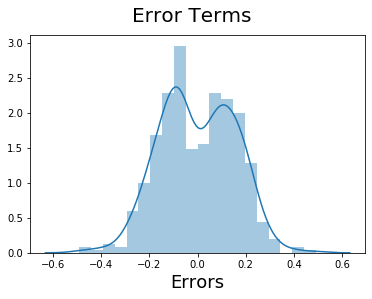

In [244]:
# plotting histograms for the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

**Predicting the y_pred by using the model**

In [245]:
#Applyinf scaling on the test sets

numeric = ['temp', 'hum', 'windspeed', 'cnt']

df_test[numeric] = scaler.fit_transform(df_test[numeric])


C:\Users\adash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\adash\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [246]:
# Dividing X & y train sets
y_test = df_test.pop('cnt')
X_test = df_test

In [247]:
# using model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test which is of model 11 final model
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

KeyError: "['const'] not in index"